# Tarea 6

**Alumna:** Sofía Castro Varona

**Fecha de entrega:** Miércoles 11 de mayo del 2022


**Instrucciones:** El código de la solución a los enunciados de esta tarea debe de escribirse usando jupyter notebook. Debes entregar la tarea en formato HTML y en ipynb en la platafoma de classroom. Además, debes comentar que acción, operación y/o proceso están realizando las líneas del código solución.

1.- Considerando el conjunto de puntos $(-1,1),(0,3),(1,1.25),(2,0.5),(3,-0.75)$ realiza una interpolación por splin de tercer orden. 

Escribe todas las ecuaciones de los polinomios así como el sistema de ecuaciones a resover en forma matricial $Ac=b$. No olvides graficar la función interpoladora.


2.- Interpole los siguientes puntos considerando la interpolación de Lagrange:
$(1,1),(2,4),(3,1),(4,5),(5,6),(6,4.5)$

Gráfica el resultado, ¿que sucede si evaluamos la función interpoladora para $x$ fuera del intervalo $[2,6]$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

**Ejercicio 1**

Puntos :  $(-1,1),(0,3),(1,1.25),(2,0.5),(3,-0.75)$

Se tiene $n = 5$, por lo que se necesita un total de $4(n-1)$ ecuaciones, es decir, 16 incógnitas.

$
\left.\begin{array}{ccccccc}
a_1x^3+&b_1x^2+&c_1x& + d_1& para & -1 \leq x < 0 \\
a_2x^3+&b_2x^2+&c_2x& + d_2& para & 0 \leq x < 1\\
a_3x^3+&b_3x^2+&c_3x& + d_3& para & 1 \leq x < 2 \\
a_4x^3+&b_4x^2+&c_4x& + d_4& para & 2 \leq x \leq  3
\end{array}\right\rbrace S(x)
$


Interpolación de datos:

$S_1(-1) = -a_1 + b_1 -c_1 + d_1 = 1 \cdots (1)$

$S_1(0) =  d_1 = 3 \cdots (2)$

$S_2(0) =  d_2 = 3 \cdots (3)$

$S_2(1) = a_2 + b_2 + c_2 + d_2 = 1.25 \cdots (4)$

$S_3(1) = a_3 + b_3 + c_3 + d_3 = 1.25 \cdots (5)$

$S_3(2) = 8a_3 + 4b_3 + 2c_3 + d_3 = 0.5 \cdots (6)$

$S_4(2) = 8a_4 + 4b_4 + 2c_4 + d_4 = 0.5 \cdots (7)$

$S_4(3) = 27a_4 + 9b_4 + 3c_4 + d_4 = -0.75 \cdots (8)$

Para las primeras derivadas continuas, se tiene que $ i = n-2$, por lo tanto $i = 3$. Además:

$S_{1}^{\prime}(x_{i+1}) = S_{2}^{\prime}(x_{i+1})$

$S_{2}^{\prime}(x_{i+2}) = S_{3}^{\prime}(x_{i+2}) $

$S_{3}^{\prime}(x_{i+3}) = S_{4}^{\prime}(x_{i+3})$

Recordando que:

$S_{i}^{\prime}(x) = 3a_ix^{2} + 2 b_ix + c_i$

Las ecuaciones quedan de la siguiente manera:

$c_1 - c_2 = 0 \cdots (9)$

$3a_2 + 2b_2 + c_2 - 3a_3 - 2b_3 - c_3 = 0 \cdots (10)$

$12a_3 + 4b_3 + c_3 - 12a_4 - 4b_4 - c_4 = 0 \cdots (11)$

Para las segundas derivadas continuas, al igual que las primeras $i = 3$ y también se tiene que cumplir la condición de que

$S_{1}^{\prime\prime}(x_{i+1}) = S_{2}^{\prime\prime}(x_{i+1})$

$S_{2}^{\prime\prime}(x_{i+2}) = S_{3}^{\prime\prime}(x_{i+2}) $

$S_{3}^{\prime\prime}(x_{i+3}) = S_{4}^{\prime\prime}(x_{i+3})$


Se recuerda que

$S_{1}^{\prime\prime}(x_{i+1}) = 6a_ix + 2b_i $

Nuestras ecuaciones quedan como:

$2a_1 - 2b_2 = 0 \cdots (12)$

$6a_2 + 2b_2 - 6a_3 - 2b_3 = 0 \cdots (13)$

$12a_3 + 2b_3 - 12a_4 - 2b_4 = 0 \cdots (14)$

Para las ecuaciones de frontera, se asume que las segundas derivadas son cero en los extremos:

$-6a_1 + 2b_1 = 0 \cdots (15)$

$18 a_4 + 2b_4 = 0 \cdots (16)$

Ahora, se desarrolla la matriz  $Ac=b$

$
\left[\begin{array}{cccc}
-1&1&-1&1& 0&0&0&0& 0&0&0&0 & 0&0&0&0\\ 
0&0&0&1& 0&0&0&0 & 0&0&0&0 & 0&0&0&0\\
0&0&0&0& 0&0&0&1 & 0&0&0&0 & 0&0&0&0\\
0&0&0&0& 1&1&1&1& 0&0&0&0 & 0&0&0&0\\
0&0&0&0& 0&0&0&0& 1&1&1&1& 0&0&0&0\\
0&0&0&0& 0&0&0&0& 8&4&2&1& 0&0&0&0\\
0&0&0&0& 0&0&0&0& 0&0&0&0 &8&4&2&1\\
0&0&0&0& 0&0&0&0& 0&0&0&0 &27&9&3&1 \\
0&0&1&0& 0&0&-1&0& 0&0&0&0& 0&0&0&0 \\
0&0&0&0& 3&2&1&0& -3&-2&-1&0 &0&0&0&0 \\
0&0&0&0& 0&0&0&0& 12&4&1&0 &-12&-4&-1&0 \\
2&0&0&0& 0&-2&0&0& 0&0&0&0& 0&0&0&0& \\
0&0&0&0& 6&2&0&0& -6&-2&0&0& 0&0&0&0& \\
0&0&0&0& 0&0&0&0& 12&2&0&0& -12&-2&0&0& \\
-6&2&0&0& 0&0&0&0& 0&0&0&0& 0&0&0&0& \\
0&0&0&0& 0&0&0&0& 0&0&0&0& 18&2&0&0&
\end{array}
\right]
\left[\begin{array}{c}
a_1\\
b_1\\
c_1\\
d_1\\
a_2\\
b_2\\
c_2\\
d_2\\
a_3\\
b_3\\
c_3\\
d_3\\
a_4\\
b_4\\
c_4\\
d_4\\
\end{array}
\right]
=
\left[\begin{array}{c}
1\\
3\\
3\\
1.25 \\
1.25\\
0.5 \\
0.5\\
-0.75 \\ 
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]
$

In [2]:
A = np.array([[-1, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 2, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 9, 3, 1],
            [0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 2, 1, 0, -3, -2, -1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 12, 4, 1, 0, -12, -4, -1, 0], [2, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 6, 2, 0, 0, -6, -2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 12, 2, 0, 0, -12, -2, 0, 0],
            [-6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 2, 0, 0]])

In [3]:
b = np.array([1, 3, 3, 1.25, 1.25, 0.5, 0.5, -0.75, 0, 0, 0, 0, 0, 0, 0, 0]) #Este vector corresponde a los resultados 
                                                                             #de cada ecuación

In [4]:
c = np.linalg.solve(A,b)
c = c[::-1] #Como las incógnitas salen invertidas, las multiplico por -1 para reordenarlas 
print(c, 'Hay un total de', len(c), 'incógnitas') #Confirmo que sí se resolvieron las 16 incógnitas

[-2.63793103  4.85775862 -2.11422414  0.23491379  4.63793103 -6.05603448
  3.34267241 -0.67456897  3.         -1.14224138 -1.57112069  0.96336207
  3.         -1.14224138 -4.71336207 -1.57112069] Hay un total de 16 incógnitas


In [5]:
p_i1 = np.polynomial.Polynomial(c[12:16]) #Polinomio para i = 1 se agarran los últimos cuatros valores
print(p_i1)
p_i2 = np.polynomial.Polynomial(c[8:12]) #Polinomio para i = 2 se agarran los penúltimos cuatros valores
print(p_i2)
p_i3 = np.polynomial.Polynomial(c[4:8]) #Polinomio para i = 3 se agarran los antepenúltimos cuatros valores
print(p_i3)
p_i4 = np.polynomial.Polynomial(c[0:4]) #Polinomio para i = 4 se agarran los primeros cuatros valores
print(p_i4)

3.0 - 1.1422413793103452 x**1 - 4.713362068965517 x**2 -
1.5711206896551724 x**3
3.0 - 1.1422413793103452 x**1 - 1.5711206896551722 x**2 +
0.9633620689655173 x**3
4.63793103448276 - 6.056034482758623 x**1 + 3.342672413793105 x**2 -
0.6745689655172417 x**3
-2.637931034482763 + 4.85775862068966 x**1 - 2.1142241379310365 x**2 +
0.23491379310344854 x**3


In [11]:
#Ahora vamos a graficar, para eso hay que poner el dominio de cada polinomio correspondiente
x1 = np.linspace(-1,0,100)
x2 = np.linspace(0,1,100)
x3 = np.linspace(1,2,100)
x4 = np.linspace(2,3,100)

In [12]:
#Puntos a interpolar
x = np.array([-1, 0, 1, 2, 3])
y = np.array([1, 3, 1.25, 0.5, -0.75])

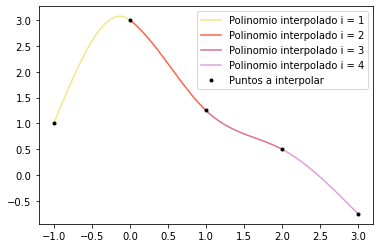

In [13]:
plt.plot(x1,p_i1(x1), label = "Polinomio interpolado i = 1", color = 'khaki')
plt.plot(x2,p_i2(x2), label = "Polinomio interpolado i = 2", color = 'tomato')
plt.plot(x3,p_i3(x3), label = "Polinomio interpolado i = 3", color = 'palevioletred')
plt.plot(x4,p_i4(x4), label = "Polinomio interpolado i = 4", color = 'plum')
plt.plot(x,y,"k.", label = 'Puntos a interpolar')
plt.legend()

Además, podemos corroborarlo con la función *interpolate.interp1d* de SciPy

In [14]:
f_i = interp1d(x,y,kind = 3) #Polinomio de grado 3
xx = np.linspace(-1,3,100) #El dominio de nuestra función es de -1 a 3

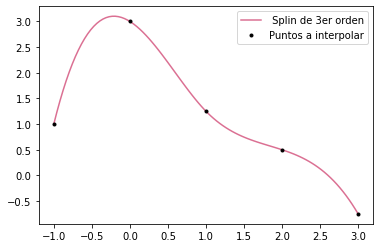

In [15]:
plt.plot(xx,f_i(xx), label =" Splin de 3er orden", color = 'palevioletred')
plt.plot(x,y,"k.",label = "Puntos a interpolar")
plt.legend()

**Ejercicio 2**

Puntos: $(1,1),(2,4),(3,1),(4,5),(5,6),(6,4.5)$

Se tiene $n = 6$, es decir, $i = 1, 2, 3, 4, 5, 6$. De tal manera que las bases generadoras son:

$
P_1(x)=\dfrac{(x-x_2)(x-x_3)(x-x_4)(x-x_5)(x-x_6)}{(x_1-x_2)(x_1-x_3)(x_1-x_4)(x_1-x_5)(x_1-x_6)} = \dfrac{(x-2)(x-3)(x-4)(x-5)(x-6)}{(1-2)(1-3)(1-4)(1-5)(1-6)} 
$

$
 = -\dfrac{x^5-20x^4+155x^3-580x^2+1044x-720}{120}
$

$
P_2(x)=\dfrac{(x-x_1)(x-x_3)(x-x_4)(x-x_5)(x-x_6)}{(x_2-x_1)(x_2-x_3)(x_2-x_4)(x_2-x_5)(x_2-x_6)} = \dfrac{(x-1)(x-3)(x-4)(x-5)(x-6)}{(2-1)(2-3)(2-4)(2-5)(2-6)}
$

$
= \dfrac{x^5-19x^4+137x^3-461x^2+702x-360}{24}
$

$
P_3(x)=\dfrac{(x-x_1)(x-x_2)(x-x_4)(x-x_5)(x-x_6)}{(x_3-x_1)(x_3-x_2)(x_3-x_4)(x_3-x_5)(x_3-x_6)} = \dfrac{(x-1)(x-2)(x-4)(x-5)(x-6)}{(3-1)(3-2)(3-4)(3-5)(3-6)} 
$

$
= -\dfrac{x^5-18x^4+121x^3-372x^2+508x-240}{12}
$

$
P_4(x)=\dfrac{(x-x_1)(x-x_2)(x-x_3)(x-x_5)(x-x_6)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)(x_4-x_5)(x_4-x_6)} = \dfrac{(x-1)(x-2)(x-3)(x-5)(x-6)}{(4-1)(4-2)(4-3)(4-5)(4-6)} 
$

$
= \dfrac{x^5-17x^4+107x^3-307x^2+396x-180}{12}
$

$
P_5(x)=\dfrac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)(x-x_6)}{(x_5-x_1)(x_5-x_2)(x_5-x_3)(x_5-x_4)(x_4-x_6)} = \dfrac{(x-1)(x-2)(x-3)(x-4)(x-6)}{(5-1)(5-2)(5-3)(5-4)(5-6)} 
$

$
= -\dfrac{x^5-16x^4+95x^3-260x^2+324x-144}{24}
$

$
P_6(x)=\dfrac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)(x-x_5)}{(x_6-x_1)(x_6-x_2)(x_6-x_3)(x_6-x_4)(x_6-x_5)} = \dfrac{(x-1)(x-2)(x-3)(x-4)(x-5)}{(6-1)(6-2)(6-3)(6-4)(6-5)} 
$

$
= \dfrac{x^5-15x^4+85x^3-225x^2+274x-120}{120}
$

El procedimiento del polinomio queda de la siguiente manera:

$L(x)=y_1P_1(x) + y_2P_2(x) + y_3P_3(x) + y_4P_4(x) + y_5P_5(x) + y_6P_6(x)$ y para cada $y_iP_i$ se tienen los siguientes resultados:

$
y_1P_1(x) = (1)(-\dfrac{x^5-20x^4+155x^3-580^2+1044x-720}{120}) = -\dfrac{x^5-20x^4+155x^3-580x^2+1044x-720}{120}
$

$
y_2P_2(x) = (4)(\dfrac{x^5-19x^4+137x^3-461x^2+702x-360}{24}) = \dfrac{x^5-19x^4+137x^3-461x^2+702x-360}{6}
$

$
y_3P_3(x) = (1)(-\dfrac{x^5-18x^4+121x^3-372x^2+508x-240}{12}) = -\dfrac{x^5-18x^4+121x^3-372x^2+508x-240}{12}
$

$
y_4P_4(x) = (5)(\dfrac{x^5-17x^4+107x^3-307x^2+396x-180}{12}) = \dfrac{5x^5-85x^4+535x^3-1535x^2+1980x-900}{12}
$

$
y_5P_5(x) = (6)(-\dfrac{x^5-16x^4+95x^3-260x^2+324x-144}{24}) = -\dfrac{x^5-16x^4+95x^3-260x^2+324x-144}{4}
$

$
y_6P_6(x) = (4.5)(\dfrac{x^5-15x^4+85x^3-225x^2+274x-120}{120}) = \dfrac{3x^5-45x^4+255x^3-675x^2+822x-360}{80}
$

Al sumar cada expresión se obtiene:

$
\dfrac{1}{240}(67x^5-1235x^4+8515x^3-26965x^2+38458x-18600)
$

O también

$
\dfrac{67x^5}{240} - \dfrac{247x^4}{48} + \dfrac{1703x^3}{48} - \dfrac{5393x^2}{48} + \dfrac{19229x}{120} - \dfrac{155}{2}
$

In [16]:
#Para construir nuestro polinomio pongo los coeficientes en una lista para después crearlo con Polynomial
coef = [-155/2, 19229/120, -5393/48, 1703/48, -247/48, 67/240] #Se ponen los coeficientes "invertidos"
poli = np.polynomial.Polynomial(coef)
poli

Polynomial([ -77.5       ,  160.24166667, -112.35416667,   35.47916667,
         -5.14583333,    0.27916667], domain=[-1,  1], window=[-1,  1])

In [17]:
xL = np.array([1, 2, 3, 4, 5, 6]) #X a interpolar
yL = np.array([1, 4, 1, 5, 6, 4.5]) #Y a interpolar
xxL = np.linspace(1, 6, 150) #Dominio de nuestra función 

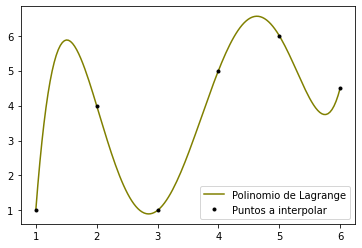

In [18]:
plt.plot(xxL, poli(xxL), label = 'Polinomio de Lagrange', color = 'olive')
plt.plot(xL, yL, 'k.', label = 'Puntos a interpolar')
plt.legend()

Además, podemos corroborarlo con la función *lagrange* de SciPy

In [19]:
fL = lagrange(xL, yL)

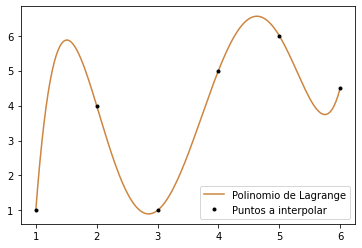

In [20]:
plt.plot(xxL, fL(xxL), label = 'Polinomio de Lagrange', color = 'peru')
plt.plot(xL, yL, 'k.', label = 'Puntos a interpolar')
plt.legend()